# <a id="#">Task 4 – Edge detection: Derivative operators</a>

In [3]:
import numpy
import matplotlib.pyplot as plt
import skimage.io as skm

---

## Prewitt filters

**<a id="#">Task 4.1.1.</a>** Load the image `data/lena.png` and show it:

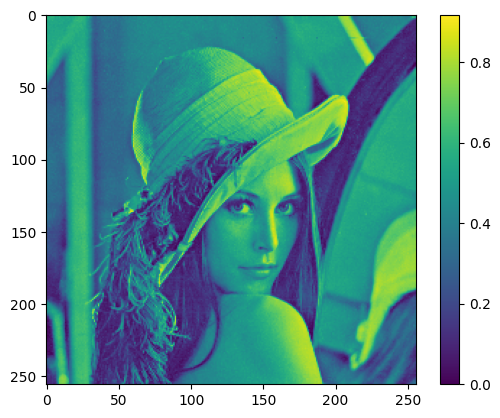

In [2]:
img_LENA = plt.imread("data/lena.png")
plt.imshow(img_LENA)
plt.colorbar()

**<a id="#">Task 4.1.2.</a>** Implement horizontal and vertical $3 \times 3$ Prewitt filters:

In [4]:
def prewitt_h(img):
    result = numpy.zeros(img.shape)
    n = 1 # The prewitt derivative operators are of dimension 3x3, hence n equals 1 consistantly
 
    rows, cols = img.shape

    for i, j in numpy.ndindex(img.shape):
        
        if n <= i < rows - n and n <= j < cols - n:

            neighborhood_adjusted = 0

            for k, l in numpy.ndindex(3, 3):
                
                if l == 0:
                    neighborhood_adjusted -= img[i - n + k, j - n + l] # !Flipped Mask, therefore we start with -=

                if l == 2:
                    neighborhood_adjusted += img[i - n + k, j - n + l] # !Other way round here

            result[i, j] = (1/6) * neighborhood_adjusted

    return result
    
def prewitt_v(img):
    result = numpy.zeros(img.shape)
    n = 1 # The prewitt derivative operators are of dimension 3x3, hence n equals 1 consistantly
 
    rows, cols = img.shape

    for i, j in numpy.ndindex(img.shape):
        
        if n <= i < rows - n and n <= j < cols - n:

            neighborhood_adjusted = 0

            for k, l in numpy.ndindex(3, 3):
                
                if k == 0:
                    neighborhood_adjusted -= img[i - n + k, j - n + l] # !Flipped Mask (see above)

                if k == 2:
                    neighborhood_adjusted += img[i - n + k, j - n + l] # ...

            result[i, j] = (1/6) * neighborhood_adjusted

    return result
    

**<a id="#">Task 4.1.3.</a>** Test your above solution using the functions `prewitt_h` and `prewitt_v` for the previously loaded image and show the result:

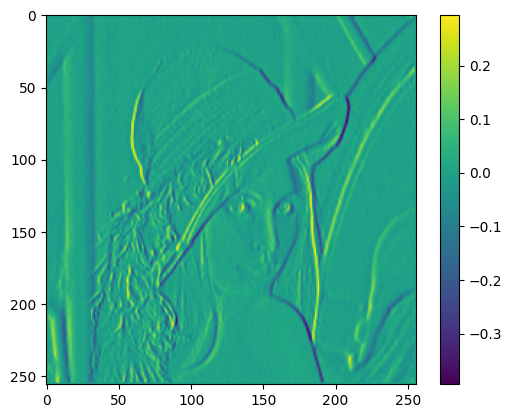

In [5]:
img_lena_h = prewitt_h(img_LENA)
plt.imshow(img_lena_h)
plt.colorbar()


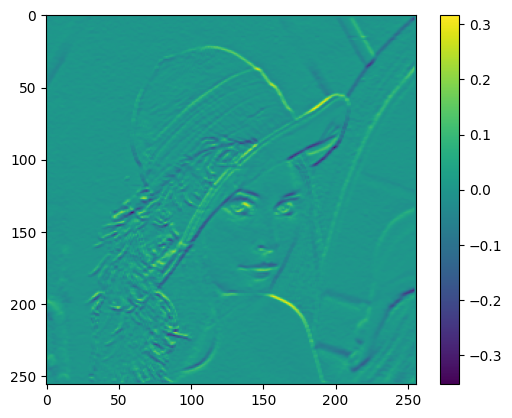

In [6]:
img_lena_v = prewitt_v(img_LENA)
plt.imshow(img_lena_v)
plt.colorbar()

**<a id="#">Task 4.1.4.</a>** Compare your results with the correct result image `data/lena_prewitt_h.tiff` and `data/lena_prewitt_v.tiff`:

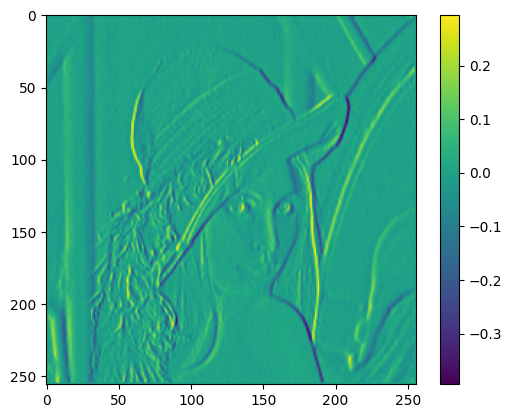

In [7]:
img_lena_h_OG = skm.imread("data/lena_prewitt_h.tiff")
plt.imshow(img_lena_h_OG)
plt.colorbar()

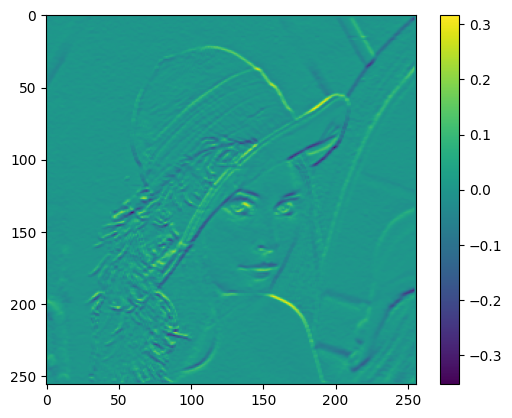

In [8]:
img_lena_v_OG = skm.imread("data/lena_prewitt_v.tiff")
plt.imshow(img_lena_v_OG)
plt.colorbar()

In [9]:
assert (numpy.allclose(img_lena_h, img_lena_h_OG, atol=1/255))

In [10]:
assert (numpy.allclose(img_lena_v, img_lena_v_OG, atol=1/255))

---

## Edge detection

**<a id="#">Task 4.2.1.</a>** Use your results from **Task 4.1.2 – 4.1.3** to compute the *gradient magnitude* of the image:

In [12]:
def magn_of_img(img):
    
    result = numpy.sqrt((prewitt_h(img) ** 2) + (prewitt_v(img) ** 2))

    return result

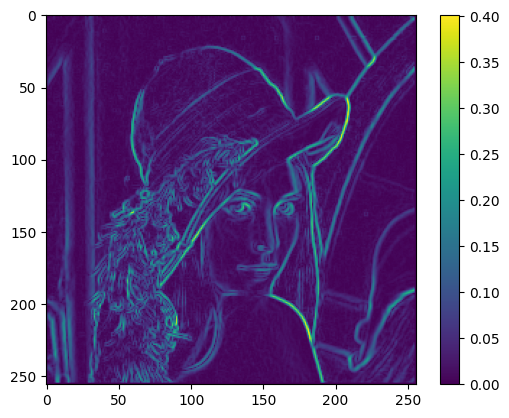

In [13]:
img_lena_magn = magn_of_img(img_LENA)
plt.imshow(img_lena_magn)
plt.colorbar()

**<a id="#">Task 4.2.2.</a>** Compare your result with the correct result image `data/lena_prewitt_gradmag.tiff`:

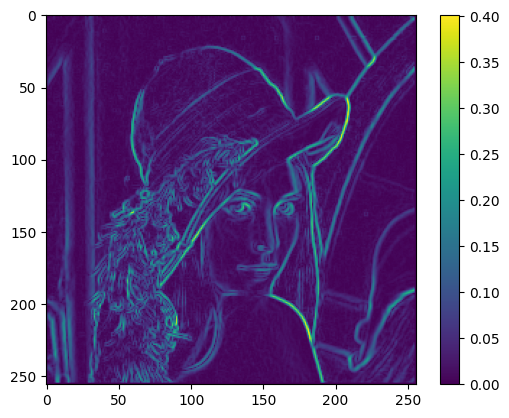

In [14]:
img_lena_magn_OG = skm.imread("data/lena_prewitt_gradmag.tiff")
plt.imshow(img_lena_magn_OG)
plt.colorbar()

In [15]:
assert (numpy.allclose(img_lena_magn, img_lena_magn_OG, atol=1/255))

---

## Sobel filters (bonus)

**<a id="#">Task 4.3.1.</a>** Implement the two functions `sobel_h` and `sobel_v` for horizontal and vertical $3 \times 3$ Sobel filtering, respectively:

In [17]:
def sobel_h(img):
    result = numpy.zeros(img.shape)
    n = 1 # The prewitt derivative operators are of dimension 3x3, hence n equals 1 consistantly
 
    rows, cols = img.shape

    for i, j in numpy.ndindex(img.shape):
        
        if n <= i < rows - n and n <= j < cols - n:

            neighborhood_adjusted = 0

            for k, l in numpy.ndindex(3, 3):
                
                if l == 0:
                    if k == 1:
                        neighborhood_adjusted -= 2 * img[i - n + k, j - n + l]
                    else:
                        neighborhood_adjusted -= img[i - n + k, j - n + l] # !Flipped Mask, therefore we start with -=

                if l == 2:
                    if k == 1:
                        neighborhood_adjusted += 2 * img[i - n + k, j - n + l]
                    else:
                        neighborhood_adjusted += img[i - n + k, j - n + l]

            result[i, j] = (1/8) * neighborhood_adjusted

    return result
    
def sobel_v(img):
    result = numpy.zeros(img.shape)
    n = 1 # The prewitt derivative operators are of dimension 3x3, hence n equals 1 consistantly
 
    rows, cols = img.shape

    for i, j in numpy.ndindex(img.shape):
        
        if n <= i < rows - n and n <= j < cols - n:

            neighborhood_adjusted = 0

            for k, l in numpy.ndindex(3, 3):
                
                if k == 0:
                    if l == 1:
                        neighborhood_adjusted -= 2 * img[i - n + k, j - n + l]
                    else:
                        neighborhood_adjusted -= img[i - n + k, j - n + l] # !Flipped Mask, therefore we start with -=

                if k == 2:
                    if l == 1:
                        neighborhood_adjusted += 2 * img[i - n + k, j - n + l]
                    else:
                        neighborhood_adjusted += img[i - n + k, j - n + l]

            result[i, j] = (1/8) * neighborhood_adjusted

    return result
    

**<a id="#">Task 4.3.2.</a>** Test your above solution using the functions `sobel_h` and `sobel_v` for the previously loaded image and show the result:

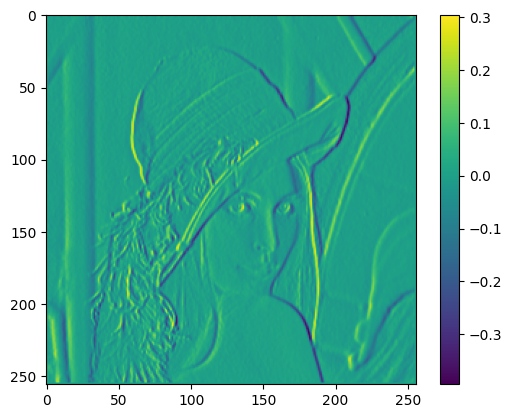

In [21]:
img_lena_sobel_h = sobel_h(img_LENA)
plt.imshow(img_lena_sobel_h)
plt.colorbar()

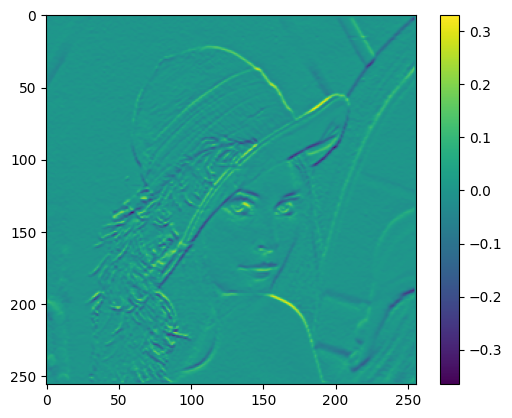

In [22]:
img_lena_sobel_v = sobel_v(img_LENA)
plt.imshow(img_lena_sobel_v)
plt.colorbar()

**<a id="#">Task 4.3.3.</a>** Compare your results with the correct result image `data/lena_sobel_h.tiff` and `data/lena_sobel_v.tiff`:

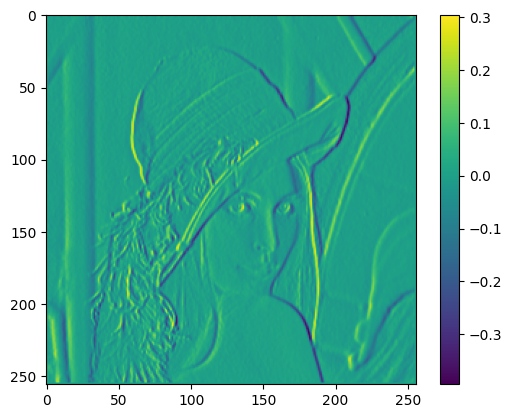

In [23]:
img_lena_sobel_h_OG = skm.imread("data/lena_sobel_h.tiff")
plt.imshow(img_lena_sobel_h_OG)
plt.colorbar()

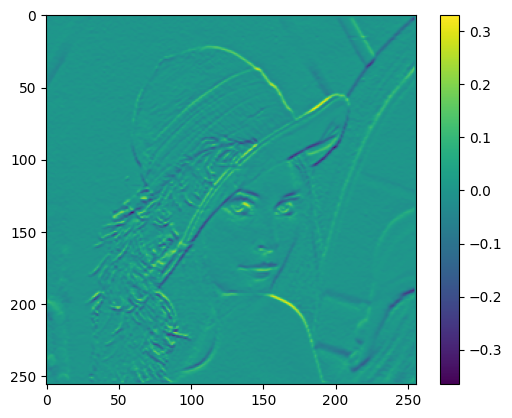

In [24]:
img_lena_sobel_v_OG = skm.imread("data/lena_sobel_v.tiff")
plt.imshow(img_lena_sobel_v_OG)
plt.colorbar()

In [ ]:
assert (numpy.allclose(img_lena_sobel_h, img_lena_sobel_h_OG, atol=1/255))

In [ ]:
assert (numpy.allclose(img_lena_sobel_v, img_lena_sobel_v_OG, atol=1/255))